# intro to pandas

see more tutorials at https://pandas.pydata.org/pandas-docs/stable/tutorials.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## loading and inspecting

In [86]:
d = pd.read_csv("data/comptagevelo2009.csv")

In [87]:
d.head()

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
0,01/01/2009,00:00,29,20,35,NaN
1,02/01/2009,00:00,19,3,22,NaN
2,03/01/2009,00:00,24,12,22,NaN
3,04/01/2009,00:00,24,8,15,NaN
4,05/01/2009,00:00,120,111,141,NaN


In [88]:
d.columns, d.shape

(Index([u'Date', u'Unnamed: 1', u'Berri1', u'Maisonneuve_1', u'Maisonneuve_2',
        u'Brébeuf'],
       dtype='object'), (365, 6))

In [89]:
d.describe()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
count,365.000000,365.000000,365.000000,178.000000
mean,2032.200000,1060.252055,2093.169863,2576.359551
std,1878.879799,1079.533086,1854.368523,2484.004743
min,0.000000,0.000000,0.000000,0.000000
25%,194.000000,90.000000,228.000000,0.000000
50%,1726.000000,678.000000,1686.000000,1443.500000
75%,3540.000000,1882.000000,3520.000000,4638.000000
max,6626.000000,4242.000000,6587.000000,7575.000000


In [90]:
d["Berri1"].head()

0     29
1     19
2     24
3     24
4    120
Name: Berri1, dtype: int64

In [91]:
type(d), type(d["Berri1"])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [92]:
d["Unnamed: 1"].unique()   

array(['00:00'], dtype=object)

In [93]:
d["Berri1"].unique()   

array([  29,   19,   24,  120,  261,   60,   35,   81,  318,  105,  168,
        145,  131,   93,   25,   52,  136,  147,  109,  172,  148,   15,
        209,   92,  110,   14,  158,  179,  122,   95,  185,   82,  190,
        228,  306,  188,   98,  139,  258,  304,  326,  134,  125,   96,
         65,  123,  129,  154,  239,  198,   32,   67,  157,  164,  300,
        176,  195,  310,    7,  366,  234,  132,  203,  298,  541,  525,
        871,  592,  455,  446,  441,  266,  189,  343,  292,  355,  245,
          0,  445, 1286, 1178, 2131, 2709,  752, 1886, 2069, 3132, 3668,
       1368, 4051, 2286, 3519, 3520, 1925, 2125, 2662, 4403, 4338, 2757,
        970, 2767, 1493,  728, 3982, 4742, 5278, 2344, 4094,  784, 1048,
       2442, 3686, 3042, 5728, 3815, 3540, 4775, 4434, 4363, 2075, 2338,
       1387, 2063, 2031, 3274, 4325, 5430, 6028, 3876, 2742, 4973, 1125,
       3460, 4449, 3576, 4027, 4313, 3182, 5668, 6320, 2397, 2857, 2590,
       3234, 5138, 5799, 4911, 4333, 3680, 1536, 30

In [94]:
d["Berri1"].dtype, d["Date"].dtype, d["Unnamed: 1"].dtype

(dtype('int64'), dtype('O'), dtype('O'))

In [95]:
d.index

RangeIndex(start=0, stop=365, step=1)

In [96]:
d[["Berri1", "Maisonneuve_1"]].head()

,Berri1,Maisonneuve_1
0,29,20
1,19,3
2,24,12
3,24,8
4,120,111


## fixing data

In [97]:
d.index = pd.to_datetime(d.Date)
del(d["Date"])
del(d["Unnamed: 1"])
d.head()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brébeuf
Date,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


In [98]:
d.columns=["Berri", "Mneuve1", "Mneuve2", "Brebeuf"]
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,NaN
2009-02-01,19,3,22,NaN
2009-03-01,24,12,22,NaN
2009-04-01,24,8,15,NaN
2009-05-01,120,111,141,NaN


In [99]:
for col in d.columns:
    print col, np.sum(pd.isnull(d[col]))

Berri 0
Mneuve1 0
Mneuve2 0
Brebeuf 187


In [100]:
d.Brebeuf.fillna(d.Brebeuf.mean(), inplace=True)

In [101]:
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,2576.359551
2009-02-01,19,3,22,2576.359551
2009-03-01,24,12,22,2576.359551
2009-04-01,24,8,15,2576.359551
2009-05-01,120,111,141,2576.359551


In [102]:
d.sort_index(inplace=True)
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,29,20,35,2576.359551
2009-01-02,14,2,2,2576.359551
2009-01-03,67,30,80,2576.359551
2009-01-04,0,0,0,2576.359551
2009-01-05,1925,1256,1501,2576.359551


## filtering

In [155]:
d[d.Berri>6000]

,Berri,Mneuve1,Mneuve2,Brebeuf,month
Date,,,,,
2009-05-06 00:05:00,6028,4120,4223,2576.359551,5
2009-06-17 00:05:00,6320,3388,6047,2576.359551,6
2009-07-15 00:05:00,6100,3767,5536,6939.000000,7
2009-09-07 00:05:00,6626,4227,5751,7575.000000,9
2009-10-07 00:05:00,6274,4242,5435,7268.000000,10


In [156]:
d[(d.Berri>6000) & (d.Brebeuf<7000)]

,Berri,Mneuve1,Mneuve2,Brebeuf,month
Date,,,,,
2009-05-06 00:05:00,6028,4120,4223,2576.359551,5
2009-06-17 00:05:00,6320,3388,6047,2576.359551,6
2009-07-15 00:05:00,6100,3767,5536,6939.000000,7


## indexing and locating

In [103]:
d[d.Berri>5500].sort_index(axis=0)

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-03-08,5904,3102,4853,7194.000000
2009-05-06,6028,4120,4223,2576.359551
2009-05-08,5611,2646,5201,7121.000000
2009-05-21,5728,3693,5397,2576.359551
2009-06-16,5668,3499,5609,2576.359551
2009-06-17,6320,3388,6047,2576.359551
2009-06-23,5799,3114,5386,2576.359551
2009-07-15,6100,3767,5536,6939.000000
2009-07-20,5607,3825,5092,7064.000000


In [104]:
d.iloc[100:110]

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-04-11,1974,1113,2693,1046.000000
2009-04-12,1108,595,1472,0.000000
2009-04-13,0,0,0,2576.359551
2009-04-14,0,0,0,2576.359551
2009-04-15,0,0,0,2576.359551
2009-04-16,0,0,0,2576.359551
2009-04-17,1286,820,1436,2576.359551
2009-04-18,1178,667,826,2576.359551
2009-04-19,2131,1155,1426,2576.359551


In [105]:
d.loc["2009-10-01":"2009-10-10"]

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-10-01,81,45,79,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-04,0,0,0,2576.359551
2009-10-05,728,362,523,2576.359551
2009-10-06,3460,2354,3978,2576.359551
2009-10-07,6274,4242,5435,7268.000000
2009-10-08,2999,1545,3185,4187.000000
2009-10-09,5496,2921,6587,6520.000000


In [106]:
d.sort_values(by="Berri").head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-07-04,0,0,0,2576.359551
2009-03-30,0,0,0,2576.359551
2009-04-04,0,0,0,2576.359551
2009-04-13,0,0,0,2576.359551
2009-04-14,0,0,0,2576.359551


In [107]:
d.sort_values(by="Berri").loc["2009-10-01":"2009-10-10"]

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-10-04,0,0,0,2576.359551
2009-10-01,81,45,79,2576.359551
2009-10-02,228,101,260,2576.359551
2009-10-03,366,203,354,2576.359551
2009-10-05,728,362,523,2576.359551
2009-10-10,1407,725,1443,1003.000000
2009-10-08,2999,1545,3185,4187.000000
2009-10-06,3460,2354,3978,2576.359551
2009-10-09,5496,2921,6587,6520.000000


## time series

In [108]:
d.rolling(3).mean().head(10)

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01,NaN,NaN,NaN,NaN
2009-01-02,NaN,NaN,NaN,NaN
2009-01-03,36.666667,17.333333,39.000000,2576.359551
2009-01-04,27.000000,10.666667,27.333333,2576.359551
2009-01-05,664.000000,428.666667,527.000000,2576.359551
2009-01-06,1733.000000,1116.333333,1409.000000,2576.359551
2009-01-07,3223.333333,1862.666667,2426.000000,2576.359551
2009-01-08,2602.666667,1795.000000,3042.666667,3673.906367
2009-01-09,3277.333333,2029.333333,4055.666667,5128.119850


In [109]:
d.index = d.index + pd.Timedelta("5m")
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01 00:05:00,29,20,35,2576.359551
2009-01-02 00:05:00,14,2,2,2576.359551
2009-01-03 00:05:00,67,30,80,2576.359551
2009-01-04 00:05:00,0,0,0,2576.359551
2009-01-05 00:05:00,1925,1256,1501,2576.359551


In [118]:
d.shift(freq=pd.Timedelta(days=365)).head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2010-01-01 00:05:00,29,20,35,2576.359551
2010-01-02 00:05:00,14,2,2,2576.359551
2010-01-03 00:05:00,67,30,80,2576.359551
2010-01-04 00:05:00,0,0,0,2576.359551
2010-01-05 00:05:00,1925,1256,1501,2576.359551


resampling

In [123]:
d.resample(pd.Timedelta("2d")).first().head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01 00:05:00,29,20,35,2576.359551
2009-01-03 00:05:00,67,30,80,2576.359551
2009-01-05 00:05:00,1925,1256,1501,2576.359551
2009-01-07 00:05:00,4471,2239,3051,2576.359551
2009-01-09 00:05:00,5298,2796,5765,6939.000000


In [124]:
d.resample(pd.Timedelta("2d")).mean().head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01 00:05:00,21.5,11.0,18.5,2576.359551
2009-01-03 00:05:00,33.5,15.0,40.0,2576.359551
2009-01-05 00:05:00,2599.5,1674.5,2113.5,2576.359551
2009-01-07 00:05:00,2267.0,1646.0,3201.0,4222.679775
2009-01-09 00:05:00,3970.5,1409.0,4646.5,4263.500000


In [126]:
d.resample(pd.Timedelta("12h")).first().head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01 00:00:00,29.0,20.0,35.0,2576.359551
2009-01-01 12:00:00,NaN,NaN,NaN,NaN
2009-01-02 00:00:00,14.0,2.0,2.0,2576.359551
2009-01-02 12:00:00,NaN,NaN,NaN,NaN
2009-01-03 00:00:00,67.0,30.0,80.0,2576.359551


oversampling

In [132]:
d.resample(pd.Timedelta("12h")).fillna(method="pad").head()

,Berri,Mneuve1,Mneuve2,Brebeuf
Date,,,,
2009-01-01 00:00:00,NaN,NaN,NaN,NaN
2009-01-01 12:00:00,29.0,20.0,35.0,2576.359551
2009-01-02 00:00:00,29.0,20.0,35.0,2576.359551
2009-01-02 12:00:00,14.0,2.0,2.0,2576.359551
2009-01-03 00:00:00,14.0,2.0,2.0,2576.359551


## building from arrays or lists

In [135]:
a = np.random.randint(10,size=(20,5))
a

array([[6, 9, 1, 8, 6],
       [8, 4, 3, 0, 0],
       [9, 7, 4, 2, 2],
       [0, 7, 8, 4, 6],
       [9, 1, 5, 5, 2],
       [5, 8, 4, 5, 7],
       [0, 2, 8, 6, 9],
       [1, 2, 3, 8, 9],
       [7, 2, 5, 8, 1],
       [4, 9, 9, 7, 0],
       [0, 0, 4, 5, 6],
       [8, 1, 2, 3, 5],
       [6, 6, 8, 2, 5],
       [4, 4, 5, 8, 6],
       [6, 5, 8, 8, 2],
       [5, 7, 4, 1, 5],
       [3, 6, 1, 7, 3],
       [5, 7, 0, 5, 0],
       [6, 4, 1, 1, 8],
       [9, 8, 3, 2, 9]])

In [137]:
k = pd.DataFrame(a, columns=["uno", "dos", "tres", "cuatro", "cinco"], index=range(10,10+len(a)))
k

,uno,dos,tres,cuatro,cinco
10,6,9,1,8,6
11,8,4,3,0,0
12,9,7,4,2,2
13,0,7,8,4,6
14,9,1,5,5,2
15,5,8,4,5,7
16,0,2,8,6,9
17,1,2,3,8,9
18,7,2,5,8,1
19,4,9,9,7,0


## plotting

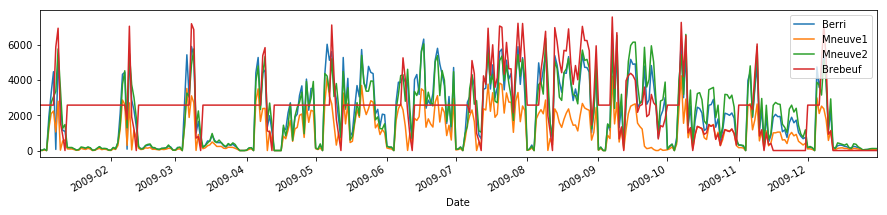

In [139]:
d.plot(figsize=(15,3))

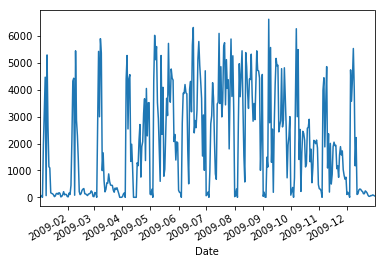

In [140]:
d.Berri.plot()

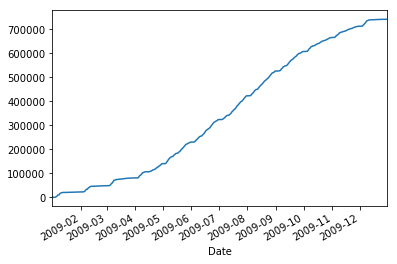

In [141]:
d.Berri.cumsum().plot()

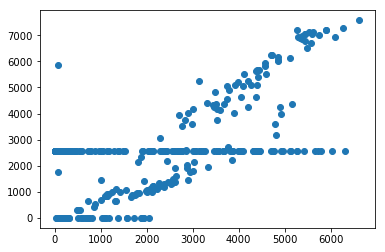

In [158]:
plt.scatter(d.Berri, d.Brebeuf)

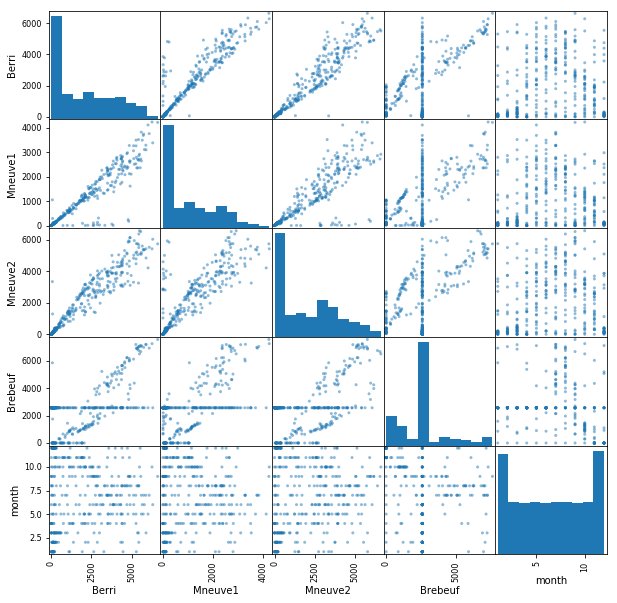

In [161]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

## grouping

In [149]:
d["month"] = [i.month for i in d.index]
d.head()

,Berri,Mneuve1,Mneuve2,Brebeuf,month
Date,,,,,
2009-01-01 00:05:00,29,20,35,2576.359551,1
2009-01-02 00:05:00,14,2,2,2576.359551,1
2009-01-03 00:05:00,67,30,80,2576.359551,1
2009-01-04 00:05:00,0,0,0,2576.359551,1
2009-01-05 00:05:00,1925,1256,1501,2576.359551,1


In [151]:
d.groupby("month").max()

,Berri,Mneuve1,Mneuve2,Brebeuf
month,,,,
1,5298,2796,5765,6939.0
2,5451,2868,5517,7052.0
3,5904,3523,5762,7194.0
4,5278,3499,5327,5837.0
5,6028,4120,5397,7121.0
6,6320,3499,6047,5259.0
7,6100,3825,5536,7219.0
8,5452,2865,6379,7044.0
9,6626,4227,6535,7575.0


In [152]:
d.groupby("month").count()

,Berri,Mneuve1,Mneuve2,Brebeuf
month,,,,
1,31,31,31,31
2,28,28,28,28
3,31,31,31,31
4,30,30,30,30
5,31,31,31,31
6,30,30,30,30
7,31,31,31,31
8,31,31,31,31
9,30,30,30,30
